In [ ]:
import cv2
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np


In [6]:
def gradient_direction(image, kernel=3, threshold=(0, 255)):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gradientx = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=kernel)
    gradienty = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel)
    abs_gradientx = np.absolute(gradientx)
    abs_gradienty = np.absolute(gradienty)
    direction_gradient = np.arctan2(abs_gradienty, abs_gradientx)
    binary_output = np.zeros_like(direction_gradient)
    binary_output[(direction_gradient >= threshold[0]) & (direction_gradient <= threshold[1])] = 1
    return binary_output

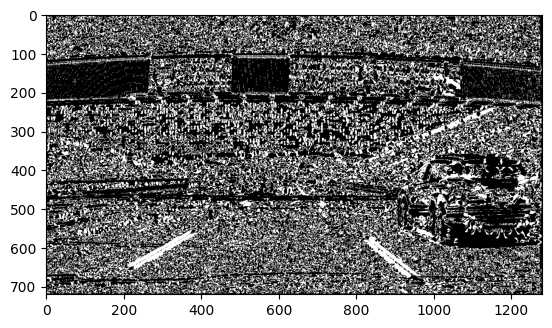

In [7]:
image = mpimg.imread("signs_vehicles_xygrad.png")
gradient_direction_threshold = gradient_direction(image, kernel=15, threshold=(0.7, 1.3))
plt.imshow(gradient_direction_threshold, cmap="gray")